In [15]:
import dpkt
import socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def parse_pcap(file_name):
    timestamps = []
    packet_sizes = []
    with open(file_name, 'rb') as f:
        pcap = dpkt.pcap.Reader(f)
        for timestamp, packet in pcap:
            eth = dpkt.ethernet.Ethernet(packet)
            if isinstance(eth.data, dpkt.ip.IP):  # check if this is an IP packet
                ip = eth.data
                packet_size = ip.len  # get the size of the packet
                timestamps.append(timestamp)
                packet_sizes.append(packet_size)
    return timestamps, packet_sizes

# use the function to parse a pcap file
timestamps, packet_sizes = parse_pcap('/Users/ct/Library/Mobile Documents/com~apple~CloudDocs/cybersecurity_robotics/presskey/capPressKey1.pcap')

# create a DataFrame in the format expected by tsfresh
df = pd.DataFrame({'id': 1, 'time': timestamps, 'packet_size': packet_sizes})


In [2]:
df

,id,time,packet_size
0,1,1.689708e+09,60
1,1,1.689708e+09,60
2,1,1.689708e+09,52
3,1,1.689708e+09,108
4,1,1.689708e+09,52
...,...,...,...
408,1,1.689708e+09,81
409,1,1.689708e+09,52
410,1,1.689708e+09,52
411,1,1.689708e+09,52


In [3]:
from tsfresh import extract_features

extracted_features = extract_features(df, column_id='id', column_sort='time')

# Show the result
print(extracted_features.head())


Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.35s/it]

   packet_size__variance_larger_than_standard_deviation  \
1                                                1.0      

   packet_size__has_duplicate_max  packet_size__has_duplicate_min  \
1                             0.0                             1.0   

   packet_size__has_duplicate  packet_size__sum_values  \
1                         1.0                  33627.0   

   packet_size__abs_energy  packet_size__mean_abs_change  \
1                4644779.0                     37.601942   

   packet_size__mean_change  packet_size__mean_second_derivative_central  \
1                 -0.019417                                          0.0   

   packet_size__median  ...  packet_size__fourier_entropy__bins_5  \
1                 81.0  ...                              0.125256   

   packet_size__fourier_entropy__bins_10  \
1                                0.37659   

   packet_size__fourier_entropy__bins_100  \
1                                2.403391   

   packet_size__permutation_entr

In [4]:
settings = {"number_peaks": [{"n": 1}], "number_cwt_peaks": [{"n": 1}]}
extracted_features = extract_features(df, column_id='id', column_sort='time', default_fc_parameters=settings)
print(extracted_features.head())

Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.21s/it]

   packet_size__number_peaks__n_1  packet_size__number_cwt_peaks__n_1
1                            29.0                               102.0


In [5]:
settings = {"fft_coefficient": [{"coeff": 0, "attr": "real"}, {"coeff": 1, "attr": "imag"}]}
extracted_features = extract_features(df, column_id='id', column_sort='time', default_fc_parameters=settings)
print(extracted_features.head())

Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]

   packet_size__fft_coefficient__attr_"real"__coeff_0  \
1                                            33627.0    

   packet_size__fft_coefficient__attr_"imag"__coeff_1  
1                                        1517.966057   


In [7]:
# assuming 'df' is your DataFrame and 'packet_size' is the column you're interested in
peaks, _ = find_peaks(df['packet_size'])

# create a new DataFrame with just the peaks and their timestamps
df_peaks = df.loc[peaks]

# now df_peaks contains the peaks and their timestamps
print(df_peaks)


     id          time  packet_size
3     1  1.689708e+09          108
5     1  1.689708e+09           81
7     1  1.689708e+09           99
11    1  1.689708e+09           92
13    1  1.689708e+09           90
..   ..           ...          ...
396   1  1.689708e+09           81
399   1  1.689708e+09           81
402   1  1.689708e+09          154
404   1  1.689708e+09           90
407   1  1.689708e+09           81

[139 rows x 3 columns]


[  9240  12360  16528  29596  26284  37090  76712  85900  85995 125030
 103486 128586 115443 157527 138473 130630 193478 170690 153902 182082
 165734 190098 363925 185030 187390 200036 209907 328448 219479 269408
 229264 204712 227396 622740 194543 227847 259045 253826 254516 228615
 163900 156654 142565 146686 151435 114934 140773 140193 114934 140773
 140193 114934 140773 140193 114934 140773 140193 114934 140773 140193
 114934 140773 140193 114934 140773 140193 114934 140773 140193 114934
 140773 140193 114934 140773 140193 114934 140773 140193 114934 140773
 140193 114934 140773 140193 114934 140773 140193 114934 140773 140193
 114934 140773 140193 114934 140773 140193 114934 140773 140193 114934
 140773 140193 114934 140773 140193 114934 140773 140193 114934 140773
 140193 114934 140773 140193 114934 140773 140193 114934 140773 140193
 114934 140773 140193 114934 140773 140193 114934 140773 140193 114934
 140773 140193 114934 140773 140193 114934 140773 140193 114934 140773
 14019

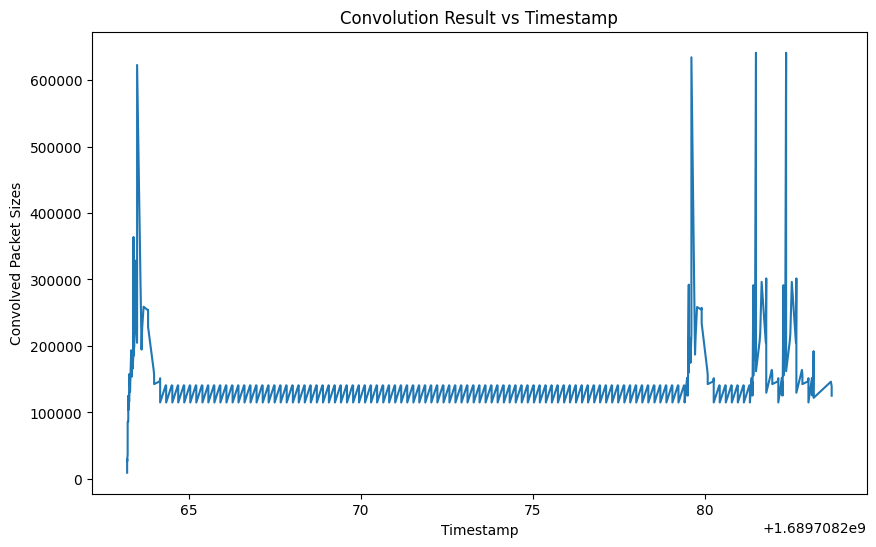

In [19]:
signal = np.array(packet_sizes)
kernel = np.array([154,52, 90, 81, 52, 81, 725, 52, 81, 90, 157, 81, 154])

result = np.convolve(signal, kernel)
print(result)

# plot the convolved result versus the timestamps
plt.figure(figsize=(10,6))
plt.plot(timestamps, result[:413])
plt.xlabel('Timestamp')
plt.ylabel('Convolved Packet Sizes')
plt.title('Convolution Result vs Timestamp')
plt.show()

In [8]:
packet_sizes

[60,
 60,
 52,
 108,
 52,
 81,
 52,
 99,
 81,
 52,
 90,
 92,
 52,
 90,
 81,
 90,
 376,
 81,
 90,
 97,
 81,
 156,
 52,
 156,
 90,
 81,
 81,
 695,
 81,
 90,
 157,
 81,
 154,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52,
 81,
 81,
 52